<a href="https://colab.research.google.com/github/MrKuller/machine-learning/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas seaborn scikit-learn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('student_performance.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


In [ ]:
# преобразовать категориальные признаки в category
df.grade = df.grade.astype('category')
df['class_participation'] = df['class_participation'].astype('category')

In [ ]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

y = df.total_score
X = df.drop('total_score', axis=1)
X.head(n=5)

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,grade
0,1,18.5,95.6,3.8,A
1,2,14.0,80.0,2.5,B
2,3,19.5,86.3,5.3,A
3,4,25.7,70.2,7.0,A
4,5,13.4,81.9,6.9,A


In [ ]:
y.head(n=5)

,total_score
0,97.9
1,83.9
2,100.0
3,100.0
4,92.0


## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

            mean       std   count
grade                             
A      96.042375  4.930847  548644
B      77.946590  4.272258  258174
C      63.564524  4.216840  141980
D      49.380346  4.007757   44998
F      35.474146  4.050442    6204


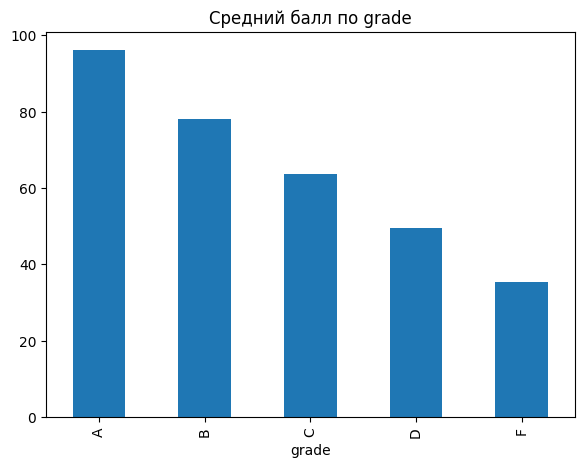

                          mean        std  count
class_participation                             
0.0                  84.332042  15.382912   1420
0.1                  84.339462  14.713295    223
0.2                  84.038487  15.676652    304
0.3                  83.187500  15.800129    336
0.4                  84.420398  15.107321    402
...                        ...        ...    ...
9.6                  84.243809  15.574433   4038
9.7                  84.341348  15.597724   3635
9.8                  84.252101  15.769449   3332
9.9                  84.192769  15.450174   3015
10.0                 84.363026  15.408166  24128

[101 rows x 3 columns]


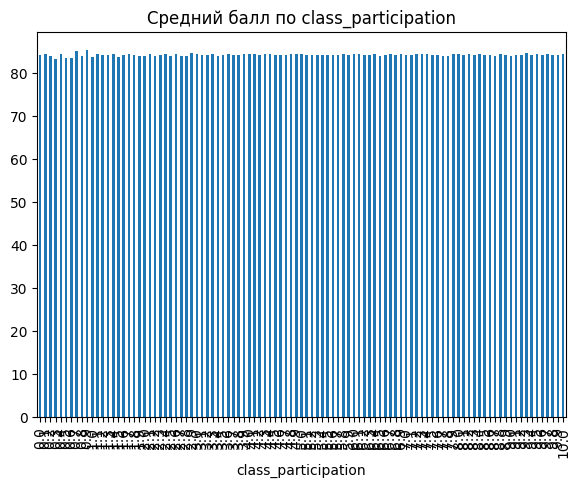

In [ ]:
#влияние категориальных переменных на y
import matplotlib.pyplot as plt

kategor = ['grade', 'class_participation']

for i in kategor:
    gStats = df.groupby(i, observed=True)['total_score'].agg(['mean', 'std', 'count'])
    print(gStats)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 2)
    df.groupby(i, observed=True)['total_score'].mean().plot(kind='bar')
    plt.title(f'Средний балл по {i}')
    plt.xticks(rotation=90)
    plt.show()

# Анализ

Grage играет важную роль в итоговой оценке, чем выше оценка студента, тем выше его итоговый балл

class_participation не влияет на итоговую оценку

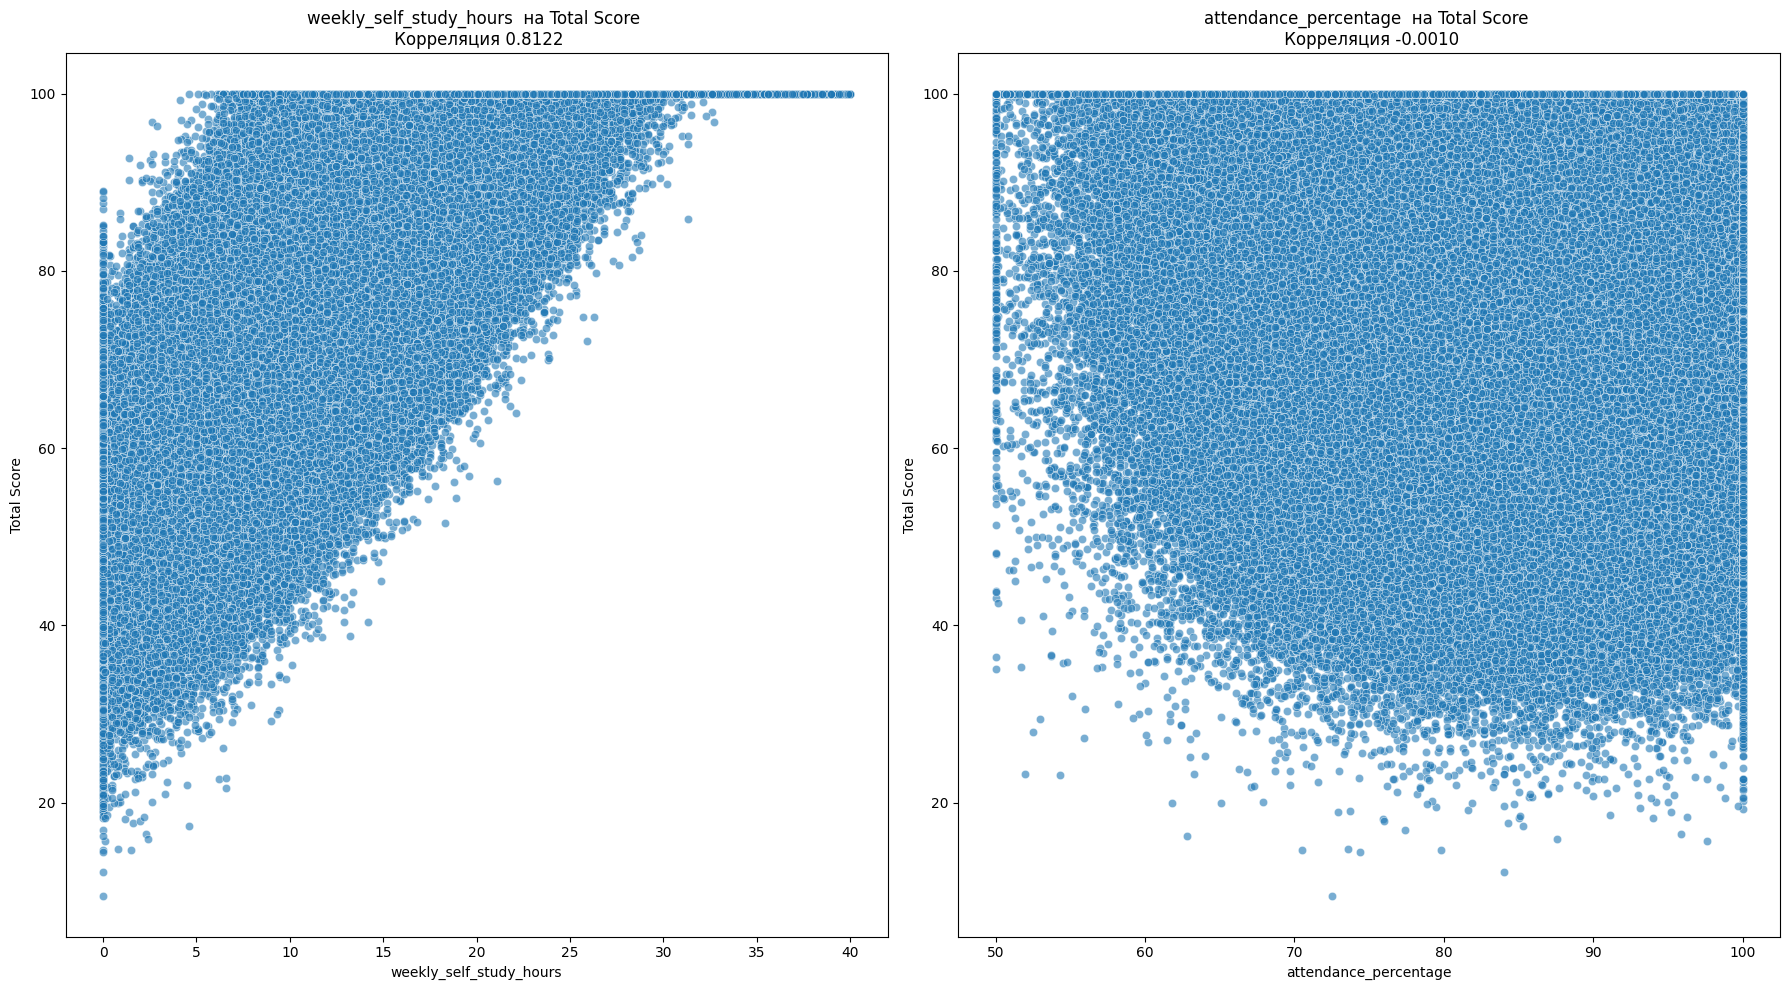

In [ ]:
#влияние числовых переменных на y
import seaborn as sns
chisl = ['weekly_self_study_hours', 'attendance_percentage']
correlations = df[chisl].corrwith(y).sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 10))
axes = axes.ravel()

for i, feature in enumerate(chisl):
    sns.scatterplot(x=df[feature], y=df['total_score'], alpha=0.6, ax=axes[i])
    correlation = correlations[feature]
    axes[i].set_title(f'{feature}  на Total Score \n Корреляция {correlation:.4f}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Total Score')

plt.tight_layout()
plt.show()


# Анализ

weekly_self_study_hours имеет высокую зависимость с total_study

attendance_percentage не имеет зависимости

In [ ]:
categorial_features = ['grade'] # перечислить названия колонок с категориальными фичами
numeric_features = ['weekly_self_study_hours'] # перечислить названия колонок с категориальными фичами
best_features = categorial_features + numeric_features

## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

## Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [ ]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["grade"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат
X_encoded = encoded

### Преобразование числовых

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['weekly_self_study_hours', 'attendance_percentage', 'class_participation']]) # попробовать избавиться от категориальных. То ест не засовывать такие признаки в стандартизацию


In [ ]:
import numpy as np
X_all_n = np.hstack([X_encoded, X_scaled])
X_all = pd.DataFrame(X_all_n)
X_all.head()

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,0.0,0.0,0.503067,1.155432,-1.116940
1,0.0,1.0,0.0,0.0,0.0,-0.149161,-0.499891,-1.781419
2,1.0,0.0,0.0,0.0,0.0,0.648006,0.168605,-0.350233
3,1.0,0.0,0.0,0.0,0.0,1.546632,-1.539774,0.518701
4,1.0,0.0,0.0,0.0,0.0,-0.236125,-0.298281,0.467588


In [ ]:
grade_columns = [f'{cat}' for cat in encoder.categories_[0]]
numeric_columns = ['weekly_self_study_hours', 'attendance_percentage', 'class_participation']
all_columns = grade_columns + numeric_columns
X_all = pd.DataFrame(X_all_n, columns=all_columns)
X_all.head()

,A,B,C,D,F,weekly_self_study_hours,attendance_percentage,class_participation
0,1.0,0.0,0.0,0.0,0.0,0.503067,1.155432,-1.116940
1,0.0,1.0,0.0,0.0,0.0,-0.149161,-0.499891,-1.781419
2,1.0,0.0,0.0,0.0,0.0,0.648006,0.168605,-0.350233
3,1.0,0.0,0.0,0.0,0.0,1.546632,-1.539774,0.518701
4,1.0,0.0,0.0,0.0,0.0,-0.236125,-0.298281,0.467588


In [ ]:
columns_drop = ['attendance_percentage', 'class_participation']
X_best = X_all.drop(columns=columns_drop)
X_best.head()

,A,B,C,D,F,weekly_self_study_hours
0,1.0,0.0,0.0,0.0,0.0,0.503067
1,0.0,1.0,0.0,0.0,0.0,-0.149161
2,1.0,0.0,0.0,0.0,0.0,0.648006
3,1.0,0.0,0.0,0.0,0.0,1.546632
4,1.0,0.0,0.0,0.0,0.0,-0.236125


### Модель1

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_all, y)

LinearRegression()

In [ ]:
y_pred = model1.predict(X_all)
y_pred

array([95.60679951, 78.89911111, 96.10596765, ..., 93.44708053,
       99.01439517, 95.50673843])

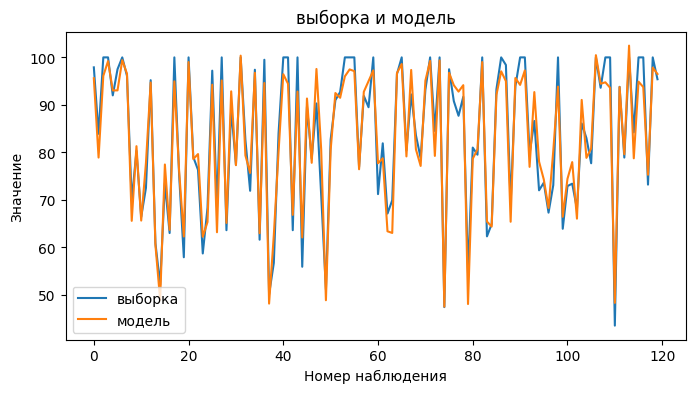

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

n = 120
y_small = y[:n]
y_pred_small = y_pred[:n]

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(y_small)), y=y_small, label="выборка")
sns.lineplot(x=range(len(y_pred_small)), y=y_pred_small, label="модель")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("выборка и модель")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

MAE = mean_absolute_error(y, y_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

MSE = mean_squared_error(y, y_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred)
print('RMSE=%.3f' % RMSE)

R2 = r2_score(y, y_pred)
print('R2=%.3f' % R2)

MAE 3.337
MAPE=0.042, MAPE_as_percent=4.186%
MSE=16.230
RMSE=4.029
R2=0.932


MAE
Средняя абсолютная ошибка = 3.337, это хорошо, чем ближе к 0 тем лучше

MAPE
Средняя процентная ошибка = 4.19%, <10% → отлично

MSE
Средний квадрат ошибок = 16.23, такой себе результат, далеко от 0

RMSE
Стандартное отклонине ошибок = 4.03, такой себе результат, далеко от 0

R²
Коэффициент детерминации модели = 0.932, хороший результат, близок к 1


In [ ]:
model1.coef_

array([ 2.63042888e+01,  1.18495097e+01, -3.13738963e-01, -1.25284783e+01,
       -2.53115813e+01,  3.46007888e+00, -7.28171490e-04, -3.98163807e-03])

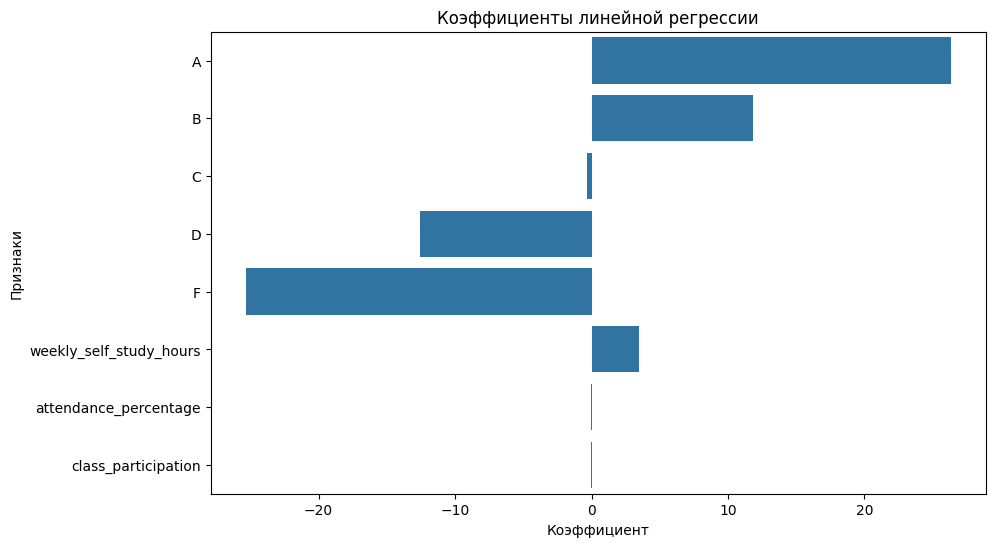

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=model1.coef_, y=X_all.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

A, B, weekly_self_study_hours - эти признаки увеличивают целевую переменную

D, F - эти признаки уменьшают целевую переменную

C, attendance_percentage, class_participation - не влияют на целевуб переменную

### Модель2

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест

In [97]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [98]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

In [99]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

MAE = mean_absolute_error(y_test, y_test_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y_test, y_test_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

MSE = mean_squared_error(y_test, y_test_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y_test, y_test_pred)
print('RMSE=%.3f' % RMSE)

R2 = r2_score(y_test, y_test_pred)
print('R2=%.3f' % R2)

MAE 3.339
MAPE=0.042, MAPE_as_percent=4.186%
MSE=16.230
RMSE=4.029
R2=0.932


In [100]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

MAE = mean_absolute_error(y_train, y_train_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y_train, y_train_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

MSE = mean_squared_error(y_train, y_train_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y_train, y_train_pred)
print('RMSE=%.3f' % RMSE)

R2 = r2_score(y_train, y_train_pred)
print('R2=%.3f' % R2)

MAE 3.337
MAPE=0.042, MAPE_as_percent=4.185%
MSE=16.230
RMSE=4.029
R2=0.932


Метрики y_test и y_train почти идентичны, и в обеих значения метрик не плохие

In [101]:
model2.coef_

array([ 2.62852029e+01,  1.18390032e+01, -3.27838747e-01, -1.25391822e+01,
       -2.52571851e+01,  3.46454348e+00,  1.39274323e-03, -1.66494311e-03])

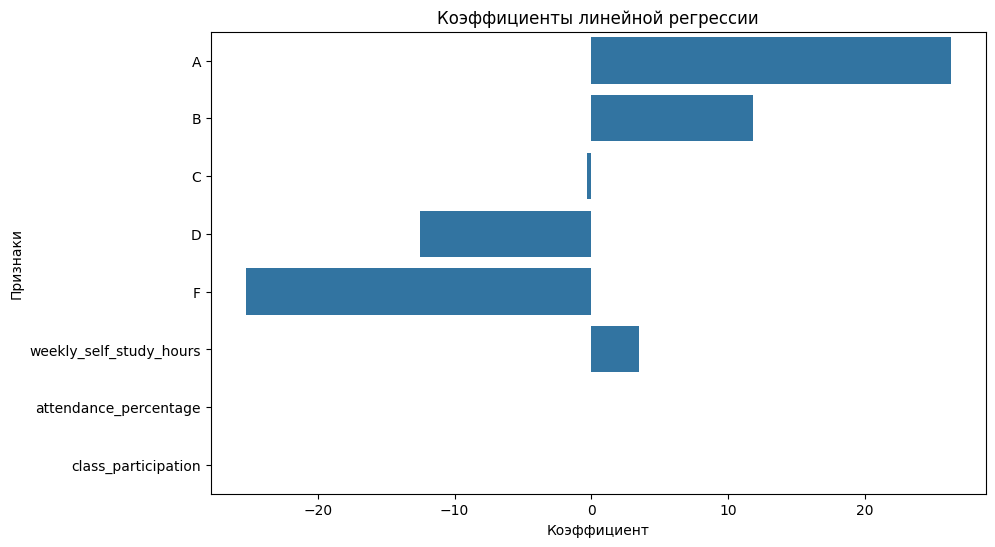

In [102]:
plt.figure(figsize=(10,6))
sns.barplot(x=model2.coef_, y=X_all.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

A, B, weekly_self_study_hours - эти признаки увеличивают целевую переменную

D, F - эти признаки уменьшают целевую переменную

C, attendance_percentage, class_participation - не влияют на целевуб переменную

### Модель3

In [88]:
from sklearn.linear_model import LinearRegression

model3 = LinearRegression()
model3.fit(X_best, y)

LinearRegression()

In [90]:
y_pred3 = model3.predict(X_best)
y_pred3

array([95.60319134, 78.89165303, 96.10469298, ..., 93.44673427,
       99.01340251, 95.50289101])

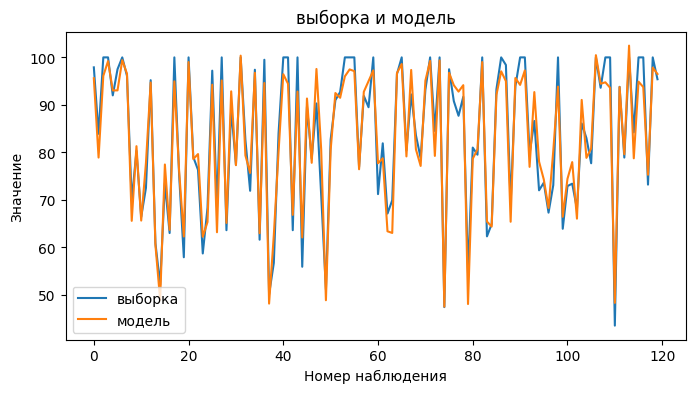

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

n = 120
y_small = y[:n]
y_pred_small = y_pred[:n]

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(y_small)), y=y_small, label="выборка")
sns.lineplot(x=range(len(y_pred_small)), y=y_pred_small, label="модель")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("выборка и модель")
plt.legend()
plt.show()

In [92]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

MAE = mean_absolute_error(y, y_pred3)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred3)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

MSE = mean_squared_error(y, y_pred3)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred3)
print('RMSE=%.3f' % RMSE)

R2 = r2_score(y, y_pred3)
print('R2=%.3f' % R2)

MAE 3.337
MAPE=0.042, MAPE_as_percent=4.186%
MSE=16.230
RMSE=4.029
R2=0.932


MAE
Средняя абсолютная ошибка = 3.337, это хорошо, чем ближе к 0 тем лучше

MAPE
Средняя процентная ошибка = 4.186%, <10% → отлично

MSE
Средний квадрат ошибок = 16.230, такой себе результат, далеко от 0

RMSE
Стандартное отклонине ошибок = 4.029, такой себе результат, далеко от 0

R²
Коэффициент детерминации модели = 0.932, хороший результат, близок к 1


In [93]:
model3.coef_

array([ 26.3042945 ,  11.84951359,  -0.31372265, -12.52849447,
       -25.31159097,   3.46007427])

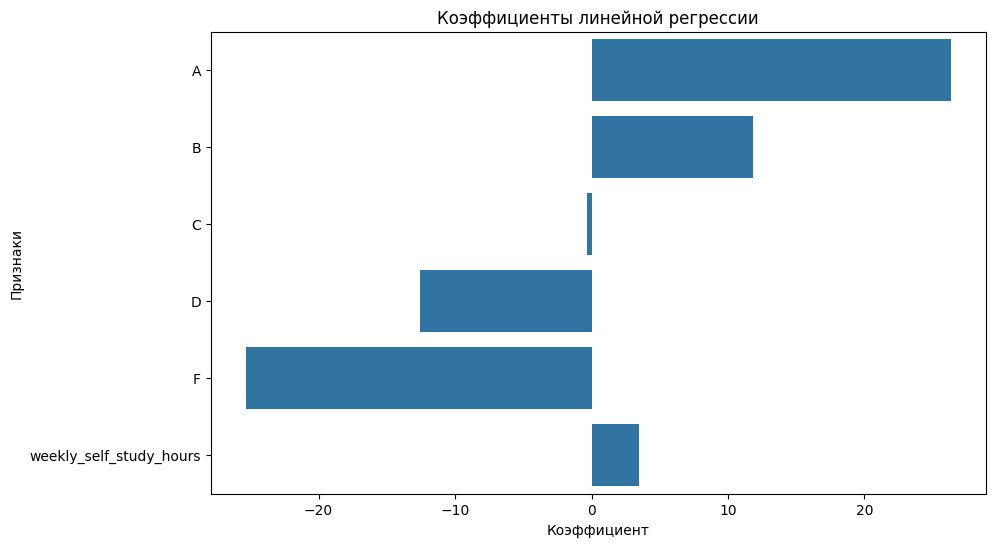

In [95]:
plt.figure(figsize=(10,6))
sns.barplot(x=model3.coef_, y=X_best.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

A, B, weekly_self_study_hours - эти признаки увеличивают целевую переменную

D, F - эти признаки уменьшают целевую переменную

C - не влияeт на целевую переменную

### Модель 4

### Разделение на обучающую, тестовую

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест

In [104]:
model4 = LinearRegression()
model4.fit(X_train, y_train)

LinearRegression()

In [105]:
y_train_pred = model4.predict(X_train)
y_test_pred = model4.predict(X_test)

In [106]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

MAE = mean_absolute_error(y_test, y_test_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y_test, y_test_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

MSE = mean_squared_error(y_test, y_test_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y_test, y_test_pred)
print('RMSE=%.3f' % RMSE)

R2 = r2_score(y_test, y_test_pred)
print('R2=%.3f' % R2)

MAE 3.339
MAPE=0.042, MAPE_as_percent=4.186%
MSE=16.230
RMSE=4.029
R2=0.932


In [107]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

MAE = mean_absolute_error(y_train, y_train_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y_train, y_train_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

MSE = mean_squared_error(y_train, y_train_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y_train, y_train_pred)
print('RMSE=%.3f' % RMSE)

R2 = r2_score(y_train, y_train_pred)
print('R2=%.3f' % R2)

MAE 3.337
MAPE=0.042, MAPE_as_percent=4.185%
MSE=16.230
RMSE=4.029
R2=0.932


Метрики y_test и y_train почти идентичны, и в обеих значения метрик не плохие

In [108]:
model4.coef_

array([ 26.28520258,  11.83899183,  -0.32784273, -12.53919277,
       -25.25715891,   3.46453689])

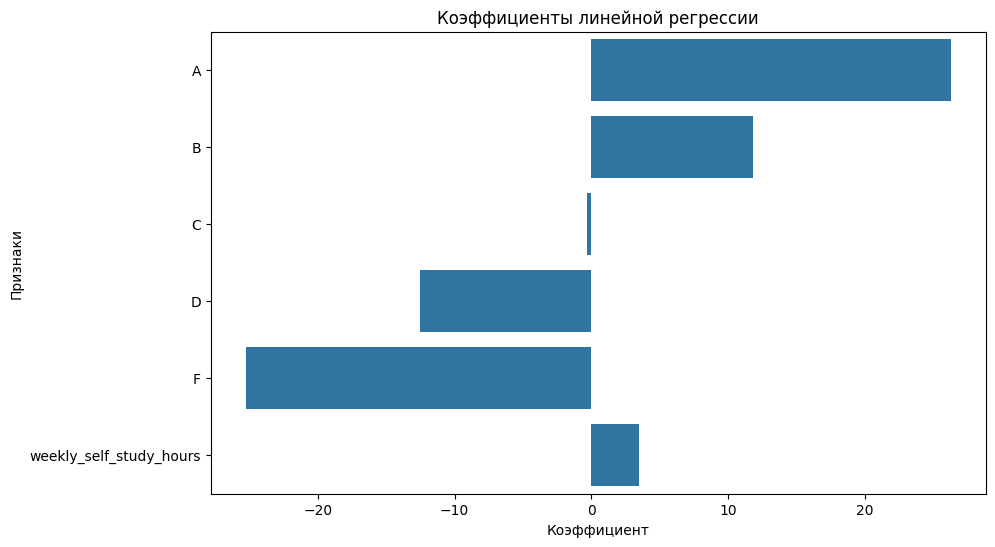

In [110]:
plt.figure(figsize=(10,6))
sns.barplot(x=model4.coef_, y=X_best.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

A, B, weekly_self_study_hours - эти признаки увеличивают целевую переменную

D, F - эти признаки уменьшают целевую переменную

C - не влияeт на целевую переменную

###Итог

Мы получили 4 модели, у которых метрики и коэффиценты почти идентичны, хотя методы и выборки были разные, это значит что их результаты надежные